In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("inventors_CN.txt", encoding = "utf8") as f:
    contents = f.readlines()

dataf = []

for x in range(len(contents)):
    contents[x] = contents[x].replace("\n","")
    contents[x] = contents[x].split(":")
    hold = contents[x][1].split(",")
    for name in hold:
        dataf += [[contents[x][0], name]]

In [3]:
df = pd.DataFrame(dataf)
df

,0,1
0,US6742018,宋松
1,US6742018,刘友祥
2,US6742018,蔡弘
3,US6519363,ƶ��׿�
4,US6519363,唐道南
...,...,...
8180,US7488732,U·舍夫尔
8181,US7488732,R·施蒂尔勒
8182,US7267198,张宝书
8183,US7185527,林秉义


In [4]:
df1 = df.copy()

df1[1] = df[1].str[1:]

df1

,0,1
0,US6742018,松
1,US6742018,友祥
2,US6742018,弘
3,US6519363,��׿�
4,US6519363,道南
...,...,...
8180,US7488732,·舍夫尔
8181,US7488732,·施蒂尔勒
8182,US7267198,宝书
8183,US7185527,秉义


In [5]:
gender1 = pd.read_csv("zhko.csv")
gender2 = pd.read_csv("zhko_with_weight.csv")

CNgender1 = gender1[gender1['langcode'] == "zh"]
CNgender2 = gender2[gender2['code'] == "CN"]

display(CNgender1)
display(CNgender2)

,name,langcode,gender
0,䁑,zh,F
1,䢖红,zh,F
2,䶮,zh,M
3,一上,zh,M
4,一不,zh,M
...,...,...,...
651900,龟瞬,zh,F
651901,龟裕,zh,M
651902,龟马,zh,M
657603,凉峰,zh,M


,name,code,gender,wgt
0,䁑,CN,F,1.000000
1,䢖红,CN,F,1.000000
2,䶮,CN,M,1.000000
3,一,CN,F,0.291112
4,一,CN,M,0.708888
...,...,...,...,...
1084580,龠,CN,M,0.666667
1094263,凉,CN,F,0.500000
1094264,凉,CN,M,0.500000
1094265,凉峰,CN,M,1.000000


In [6]:
df1.to_csv("CN_8k.csv", index = False)

In [7]:
hold1 = []

for x in df1[1]:
    if x in set(CNgender1["name"]):
        row = CNgender1.loc[CNgender1['name']== x]
        hold1 += [row['gender'].values[0]]
    elif x in set(CNgender2["name"]):
        holdf = CNgender2[CNgender2['name']==x]
        weights = holdf["wgt"].values
        diff = np.abs(weights[0] - weights[1])
        if diff < 0.2:
            hold1 += ["Andy"]
        elif weights[0] > weights[1]:
            hold1 += ["F"]
        else:
            hold1 += ["M"]
    else:
        hold1 +=["Unknown"]

hold1

['M',
 'M',
 'M',
 'Unknown',
 'M',
 'M',
 'F',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'M',
 'Unknown',
 'Unknown',
 'Unknown',
 'M',
 'M',
 'F',
 'M',
 'Unknown',
 'M',
 'M',
 'M',
 'Unknown',
 'Unknown',
 'Unknown',
 'M',
 'F',
 'M',
 'M',
 'M',
 'Unknown',
 'Unknown',
 'M',
 'F',
 'Unknown',
 'M',
 'M',
 'M',
 'Unknown',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'M',
 'M',
 'Andy',
 'M',
 'Unknown',
 'M',
 'M',
 'M',
 'M',
 'Unknown',
 'M',
 'Unknown',
 'M',
 'Unknown',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'Unknown',
 'Unknown',
 'Andy',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'M',
 'Unknown',
 'M',
 'M',
 'Unknown',
 'M',
 'M',
 'M',
 'Unknown',
 'Unknown',
 'M',
 'M',
 'M',
 'Unknown',
 'Unknown',
 'M',
 'M',
 'M',
 'M',
 'Unknown',
 'M',
 'M',
 'M'

In [8]:
# add hold1 as a column in df1
h1 = pd.Series(hold1)
df1['WGND'] = h1

df1

,0,1,WGND
0,US6742018,松,M
1,US6742018,友祥,M
2,US6742018,弘,M
3,US6519363,��׿�,Unknown
4,US6519363,道南,M
...,...,...,...
8180,US7488732,·舍夫尔,Unknown
8181,US7488732,·施蒂尔勒,Unknown
8182,US7267198,宝书,M
8183,US7185527,秉义,M


Text(0.5, 1.0, 'Chinese Inventors Gender Distribution: Chinese Characters')

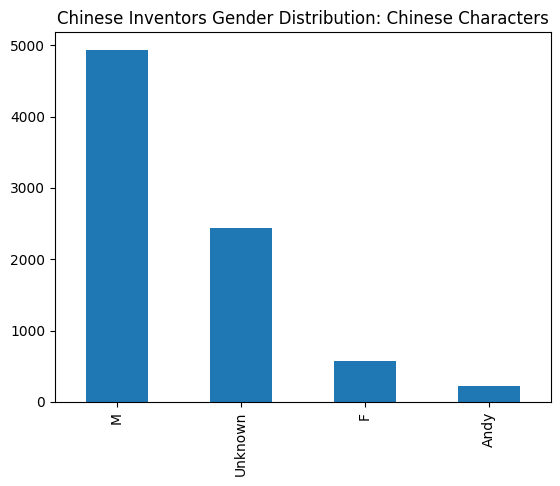

In [9]:
# graph df1 title is Korean Inventors Gender Distribution
df1['WGND'].value_counts().plot(kind='bar')
plt.title("Chinese Inventors Gender Distribution: Chinese Characters")